In [2]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification 

In [3]:
X,y = make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)

In [4]:
df = pd.DataFrame(X,columns=['co1','co2','co3','co4','co5'])

In [5]:
df['target']= y 
print(df.shape)

(100, 6)


In [6]:
df.head(3)

,co1,co2,co3,co4,co5,target
0,-0.422276,-0.424698,2.190492,-1.397005,1.102225,0
1,-0.733853,1.279131,-0.985371,1.617275,0.511757,1
2,-0.850222,-2.701085,1.714008,-0.777544,0.512470,0


In [7]:
## funtion for row sampling 

def sample_row(df,percent): 
    return df.sample(int(percent*df.shape[0]),replace=True)

In [73]:

def sample_feature(df,percent):
    cols=random.sample(df.columns.tolist()[:-1],int(percent*df.shape[1]-1))
    new_df=df[cols]
    new_df['target']=df['target']
    return new_df  

In [10]:
## function for combine sample 
def combined_sample(df, row_percent,col_percen): 
    new_df=sample_row(df,row_percent)
    return sample_feature(new_df,col_percen)

In [50]:
df1=sample_row(df,0.1)

In [51]:
df2=sample_row(df,0.1)

In [52]:
df3=sample_row(df,0.1)

In [53]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(10, 6)
(10, 6)
(10, 6)


In [54]:
from sklearn.tree import DecisionTreeClassifier 
clf1=DecisionTreeClassifier()
clf2=DecisionTreeClassifier()
clf3=DecisionTreeClassifier()

In [55]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5, 0.75, 'x[1] <= 0.554\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.625, 0.5, '  False')]

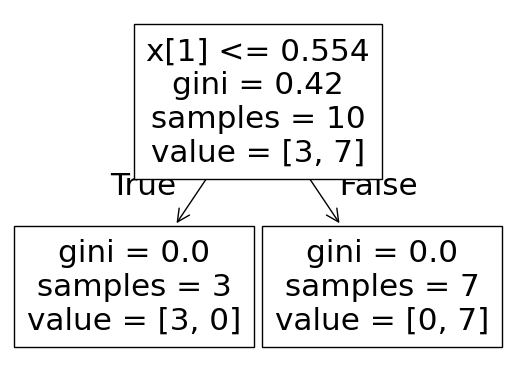

In [56]:
from sklearn.tree import plot_tree 
plot_tree(clf1)

[Text(0.5, 0.75, 'x[3] <= 0.244\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.625, 0.5, '  False')]

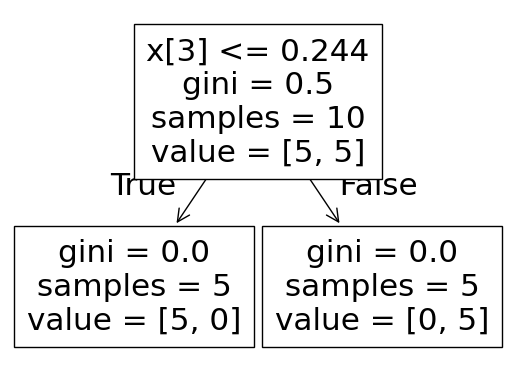

In [57]:
plot_tree(clf2)

[Text(0.5, 0.75, 'x[1] <= 0.342\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.625, 0.5, '  False')]

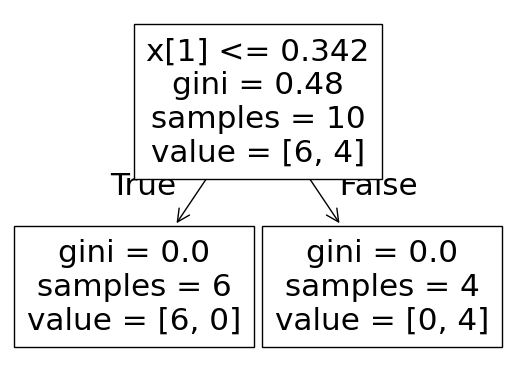

In [58]:
plot_tree(clf3)

In [59]:
df.head(4)

,co1,co2,co3,co4,co5,target
0,-0.422276,-0.424698,2.190492,-1.397005,1.102225,0
1,-0.733853,1.279131,-0.985371,1.617275,0.511757,1
2,-0.850222,-2.701085,1.714008,-0.777544,0.512470,0
3,1.853814,1.011141,-3.117871,-0.269857,2.493277,1


In [60]:
clf1.predict(np.array([-0.422276,-0.424698,2.190492,-1.397005,1.102225]).reshape(1,5))

C:\Users\raj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [61]:
clf2.predict(np.array([-0.422276,-0.424698,2.190492,-1.397005,1.102225]).reshape(1,5))

C:\Users\raj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [62]:
clf3.predict(np.array([-0.422276,-0.424698,2.190492,-1.397005,1.102225]).reshape(1,5))

C:\Users\raj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [64]:
#prediction using colums row
sample_feature(df,0.5)

,co2,co1
0,-0.424698,-0.422276
1,1.279131,-0.733853
2,-2.701085,-0.850222
3,1.011141,1.853814
4,2.472395,0.278069
...,...,...
95,-0.167928,-1.352204
96,-1.210166,-1.770376
97,1.072839,3.551483
98,-0.153106,-2.836377


In [74]:
df_new1=sample_feature(df,0.8)
df_new2=sample_feature(df,0.8)
df_new3=sample_feature(df,0.8)

C:\Users\raj\AppData\Local\Temp\ipykernel_21644\4267828881.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']
C:\Users\raj\AppData\Local\Temp\ipykernel_21644\4267828881.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']
C:\Users\raj\AppData\Local\Temp\ipykernel_21644\4267828881.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [69]:
#df_new1

In [78]:
clf1.fit(df_new1.iloc[:,0:3],df_new1.iloc[:,-1])

DecisionTreeClassifier()

In [85]:
clf2.fit(df_new2.iloc[:,0:3],df_new2.iloc[:,-1])
clf3.fit(df_new3.iloc[:,0:3],df_new3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5795454545454546, 0.9285714285714286, 'x[2] <= -0.044\ngini = 0.5\nsamples = 100\nvalue = [49, 51]'),
 Text(0.3409090909090909, 0.7857142857142857, 'x[0] <= 2.197\ngini = 0.215\nsamples = 49\nvalue = [43, 6]'),
 Text(0.4602272727272727, 0.8571428571428572, 'True  '),
 Text(0.22727272727272727, 0.6428571428571429, 'x[0] <= 1.534\ngini = 0.089\nsamples = 43\nvalue = [41, 2]'),
 Text(0.13636363636363635, 0.5, 'x[2] <= -1.845\ngini = 0.051\nsamples = 38\nvalue = [37, 1]'),
 Text(0.09090909090909091, 0.35714285714285715, 'x[2] <= -1.847\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.045454545454545456, 0.21428571428571427, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.13636363636363635, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.18181818181818182, 0.35714285714285715, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(0.3181818181818182, 0.5, 'x[0] <= 1.617\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2727272727272727, 0.357142

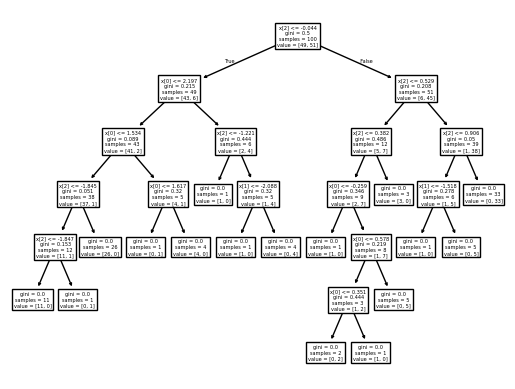

In [86]:
plot_tree(clf1)

[Text(0.5357142857142857, 0.9166666666666666, 'x[2] <= -0.044\ngini = 0.5\nsamples = 100\nvalue = [49, 51]'),
 Text(0.2857142857142857, 0.75, 'x[2] <= -0.597\ngini = 0.215\nsamples = 49\nvalue = [43, 6]'),
 Text(0.4107142857142857, 0.8333333333333333, 'True  '),
 Text(0.14285714285714285, 0.5833333333333334, 'x[1] <= -1.732\ngini = 0.108\nsamples = 35\nvalue = [33, 2]'),
 Text(0.07142857142857142, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.21428571428571427, 0.4166666666666667, 'x[2] <= -1.845\ngini = 0.057\nsamples = 34\nvalue = [33, 1]'),
 Text(0.14285714285714285, 0.25, 'x[2] <= -1.847\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.07142857142857142, 0.08333333333333333, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.21428571428571427, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2857142857142857, 0.25, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.42857142857142855, 0.5833333333333334, 'x[0] <= -1.315\

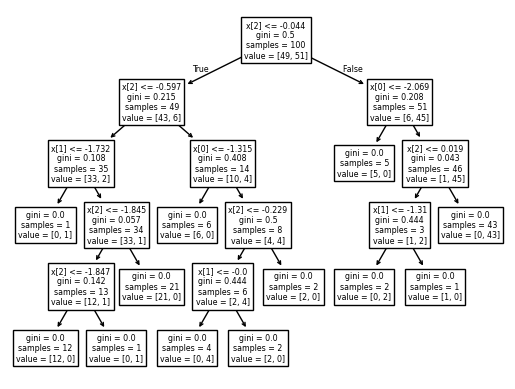

In [87]:
plot_tree(clf2)

[Text(0.5795454545454546, 0.9285714285714286, 'x[2] <= -0.044\ngini = 0.5\nsamples = 100\nvalue = [49, 51]'),
 Text(0.3409090909090909, 0.7857142857142857, 'x[0] <= 2.197\ngini = 0.215\nsamples = 49\nvalue = [43, 6]'),
 Text(0.4602272727272727, 0.8571428571428572, 'True  '),
 Text(0.22727272727272727, 0.6428571428571429, 'x[0] <= 1.534\ngini = 0.089\nsamples = 43\nvalue = [41, 2]'),
 Text(0.13636363636363635, 0.5, 'x[2] <= -1.845\ngini = 0.051\nsamples = 38\nvalue = [37, 1]'),
 Text(0.09090909090909091, 0.35714285714285715, 'x[2] <= -1.847\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.045454545454545456, 0.21428571428571427, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.13636363636363635, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.18181818181818182, 0.35714285714285715, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(0.3181818181818182, 0.5, 'x[0] <= 1.617\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2727272727272727, 0.357142

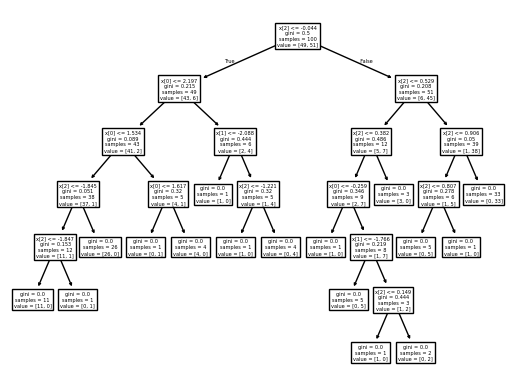

In [88]:
plot_tree(clf3)

In [ ]:
# same for commbing for all tree